In [132]:
#IMPORTS
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing


#

# INFO: 
- Modifier Domain
- Simulator
- Main function + Visualization prefixed ranges
- Simplified main function including Validator class functions
- Curve fitting estimations
- Drafts

# Modifier Domain

In [133]:

def mod_func_A(x):
    return x**2

def mod_func_B(x):
    return x*2/3

def rescaler(old_list, new_min, new_max):
    new_values=[]
    for old_value in old_list:
        new_values.append((((old_value - min(old_list)) * (new_max - new_min)) / (max(old_list) - min(old_list)))+ new_min)

    return new_values

# datapoints domain (min-max), min_mod_increment, max_mod_increment 
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
#mdv["modifier_data_point"] = 2

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])], selected_mod_function=mod_func_A, do_plot=False):
    # Function to control modifiers given the input and the selected modifier function. Option to plot or not. 
    
    print("\nModifier controller...")
    print('  * Interval: ',interval_list)
    all_interval_mod = []
    
    # Check if it's possible to generate more data points
    if mdv["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        return False  # Exit the function if not possible
    
    for i in range(len(interval_list)):
        interval_min_range = interval_list[i][0]
        interval_max_range = interval_list[i][1]
        
        # Generate data points (incremental ticks and function modified x values) within the specified interval
        mod_ticks = np.arange(interval_min_range, interval_max_range, mdv["modifier_data_point"])
        mod_x = selected_mod_function(mod_ticks)
        
        # Normalize the function outputs to fit within the interval range
        mod_x = rescaler(mod_x, new_max=interval_max_range, new_min=interval_min_range)
        all_interval_mod.append(mod_x)
    
    # update the mdv to decrease the interdatapoint distance for the next itteration
    mdv["modifier_data_point"] = mdv["modifier_data_point"] - mdv["modifier_incremental_unit"]
    
    if do_plot == True:
        # Plot the generated data points
        for mod_x in all_interval_mod:
            plt.scatter(mod_x, np.ones(np.shape(mod_x)))
            plt.show()
    
    print('  * Mod_x:   ',all_interval_mod)

    return all_interval_mod


# Simulator

In [135]:
#SIMULATOR - data substitution in Sim function
def sim_func_A(x):
    noise = np.random.normal(-100,100,len(x))
    return x**2+noise

def sim_func_B(x):
    return x*2/3

def simulator(mod_x, selected_function=sim_func_A):

    # Calculate and print the lengths of sublists
    mod_x_lengths = [len(sublist) for sublist in mod_x]

    print("\nSimulator...  array len ",len(mod_x_lengths))
    all_interval_sim =[]
    if mod_x == False: 
        return False # possible itterations have ended
    elif len(mod_x_lengths)==0: 
        simulated_y = selected_function(np.array(mod_x))
        all_interval_sim.append(list(simulated_y[0]))
    else:
        for array in mod_x:
            simulated_y = selected_function(np.array(array))
            all_interval_sim.append(list(simulated_y))
    print('  * Sim_y:   ',all_interval_sim)
    return all_interval_sim


# Main function with predefined ranges + Visualization


Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]]

Simulator...  array len  1
  * Sim_y:    [[-130.37985928212262, 71.17281098106677, 67.87039610579367, 80.07500562814786, 455.6488194719368, 940.0029128293495, 1966.293275148351, 3733.669389834723, 6201.288298218596, 9866.701339424046]]

Modifier controller...
  * Interval:  [[1, 50], [60, 90]]
  * Mod_x:    [[1.0, 2.6704545454545454, 6.9393939393939394, 13.806818181818182, 23.272727272727273, 35.33712121212121, 50.0], [60.0, 66.4358108108108, 73.58108108108108, 81.4358108108108, 90.0]]

Simulator...  array len  2
  * Sim_y:    [[-84.88239834454673, -35.42238208461405, -205.7374845896505, 147.5602837473673, 472.5296744605597, 1086.1863269525675, 2372.0839574219735], [3485.9391182872414, 4279.866317699729, 5438.635716649813, 6623.55448644999, 7944.891432133

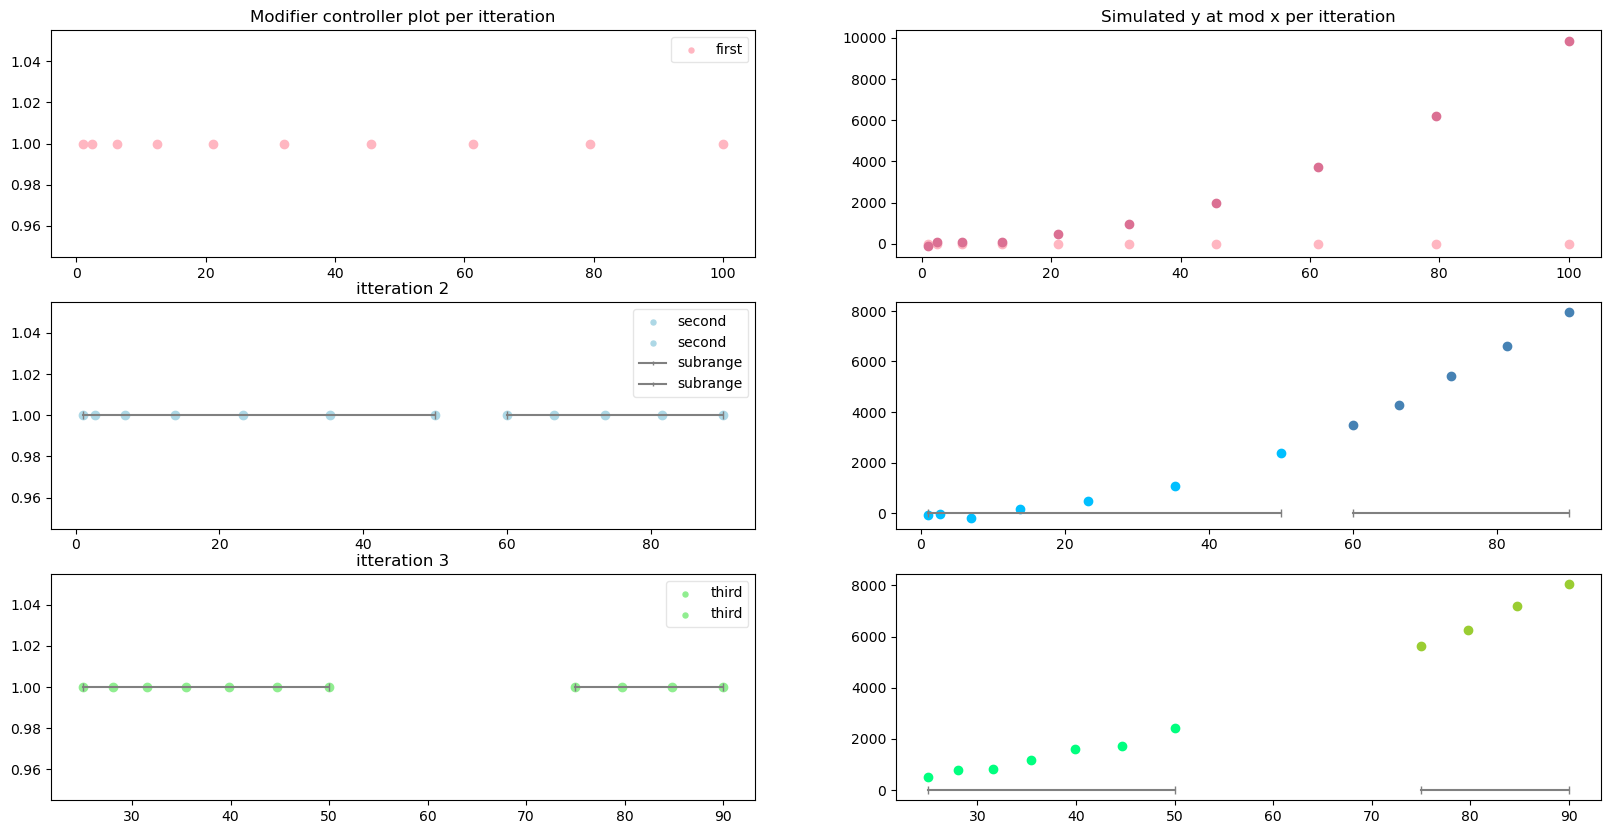

In [136]:
# PLACEHOLDER FOR THE MAIN FUNCTION
mainfunc=True
while mainfunc==True:
    # datapoints domain (min-max), min_mod_increment, max_mod_increment 
    mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}

    plt.figure(figsize = (20,10))
    appendedvars=[]

    plt.subplot(321)
    plt.title('Modifier controller plot per itteration')
    mod_x_list = modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])],do_plot=False,selected_mod_function=mod_func_A)
    plt.scatter(mod_x_list, np.ones(np.shape(mod_x_list)),label='first',color='lightpink')
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars.append(mod_x_list)

    plt.subplot(322)
    plt.title('Simulated y at mod x per itteration')
    sim_y_list = simulator(mod_x=mod_x_list,selected_function=sim_func_A)
    assert np.shape(mod_x_list) == np.shape(sim_y_list)
    plt.scatter(mod_x_list,np.ones(np.shape(mod_x_list)),color='lightpink')
    plt.scatter(mod_x_list,sim_y_list,color='palevioletred')

    plt.subplot(323)
    plt.title('itteration 2')
    ranges=[[1,50],[60,90]]
    mod_x_list_2 = modifier_controller(ranges,do_plot=False)
    for vars in mod_x_list_2:
        plt.scatter(vars, np.ones(np.shape(vars)),label='second',color='lightblue')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    appendedvars.append(mod_x_list_2)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]

    plt.subplot(324)
    mod_x=mod_x_list_2 #not mod_x_list_2
    colors=[['deepskyblue'],['steelblue']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    # for i in range(np.shape(ranges)[0]):
    sim_y_list = simulator(mod_x,selected_function=sim_func_A)
    assert len(mod_x) == len(sim_y_list)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
    mod_x_lengths = [len(sublist) for sublist in mod_x]
    for indx in range(0,len(mod_x_lengths,)):
        plt.scatter(mod_x[indx],sim_y_list[indx],color=colors[indx])


    plt.subplot(325)
    plt.title('itteration 3')
    ranges = [[25,50],[75,90]] # USE VALIDATOR FUNCTION TO GET NEW RANGES if enough itterations
    mod_x_list_3 = modifier_controller(ranges,do_plot=False)
    for vars in mod_x_list_3:
        plt.scatter(vars, np.ones(np.shape(vars)),label='third',color='lightgreen')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    appendedvars.append(mod_x_list_3)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]


    plt.subplot(326)
    mod_x=mod_x_list_3 #not var2
    colors=[['springgreen'],['yellowgreen']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    sim_y_list = simulator(mod_x,selected_function=sim_func_A)
    assert len(mod_x) == len(sim_y_list)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
    mod_x_lengths = [len(sublist) for sublist in mod_x]
    for indx in range(0,len(mod_x_lengths,)):
        plt.scatter(mod_x[indx],sim_y_list[indx],color=colors[indx])
    plt.show()
    
    mainfunc = False

In [79]:
# https://stackoverflow.com/questions/39434402/how-to-get-confidence-intervals-from-curve-fit

# Main function with Validator Class

 ### Validator class, that will have information about the histroy of simulator ranges that are within the threshhol. 
 Otherwise, rerun modifier + simulator until ranges are within threshhold OR no more itteration are possible.

 def approximator(mody, sim_y_list):
* Create curve fitting of the new sim values 
    
* calculate R square of points
    
* get intervals of bad approximation
    
* generate new modx and mody points within new intervals
    
* simulate data using new and old modx points 
    
* rerun approximator until threshhold reached (testing is 30 recurrances for now)


### Steps of Main function: 
##### Modifier 
    gets range(s) 
    makes mod_y points in that range given the increment
    returns mod_x mod_y mod points
    
##### Simulator
    gets list(s) of (x = mod_y) values
    returns list(s) of simulated [mod_x,sim_y] values
    
##### validator (VALS-LIST)
    sets history
    while(VALS-LIST != False or CURVE-FIT-OK)
        gets lists of [mod_x, sim_y] values
        updates history with values
        fits the [mod_x,sim_y] data using curve fitting
        finds ranges where data does not fit well according to hardcoded threshold
        returns the bas ranges
        
intervals: 
- if first point is wrong, get global minimum as min range. if last point wrong, get global max as mas range
- point before wrong point will be min, point after wrong point will be max. 
- if first point is not fit well, then that point is the new min of range. 
- if first point are not fit well, then they are the new min and max of range, respectfully. 
- local min vs global min for data generation
- given that point x_2 fall our of curve fit, then range will become [0.6]

        call modifier_controller for new points in bad interval(s)
        call simulator for simulating with new points in bad interval(s)
        updates history 
        curve fitting in bad intervals

In [137]:
# PLACEHOLDER FOR THE MAIN FUNCTION V2
from Validator import Validator

# Instantiate mdv values
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":2, "modifier_data_point":10}
# Create an instance of the Validator Class
validate = Validator()
appendedvars=[]

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
x=1
while mainfunc==True:
    # Run Modifier Controller Function
    mod_x_list = modifier_controller(interval_list=interval_lists,do_plot=False,selected_mod_function=mod_func_A)
    if mod_x_list == False:
        print('*   ITTERATIONS END HERE   *')
        break

    # Run Simulator Fuction
    # print('mod_list shape is: ',np.shmod_x_list))
    sim_y_list = simulator(mod_x_list,selected_function=sim_func_A)
    assert len(mod_x_list) == len(sim_y_list)
    # Get ranges of unfit points ( IF ANY )
    ranges = validate.get_range(mod_x_list,sim_y_list)
    
    if x == 1: 
        ranges = [(0,50),(70,90)]
    elif x == 2:
        ranges = [(20,30),(35,45),(70,85)]
    elif x==3: 
        ranges = False
    x=x+1
    if mod_x_list == False or not ranges: 
        mainfunc=False
        print('The END')
    interval_lists = ranges


# TODO: 
# Validator needs to work as a loop within itseft that accepts 3 different sets of points
# understand curve fitting
# Fix ranges



Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]]

Simulator...  array len  1
  * Sim_y:    [[-137.02976699133816, -36.091465509238816, -103.4100429888787, 37.289981902785826, 266.7865444927272, 732.0403350023715, 1960.8895202452347, 3721.4425665622352, 6214.762252685845, 9738.027314578796]]

Modifier controller...
  * Interval:  [(0, 50), (70, 90)]
  * Mod_x:    [[0.0, 1.3888888888888888, 5.555555555555555, 12.5, 22.22222222222222, 34.72222222222222, 50.0], [70.0, 79.48717948717949, 90.0]]

Simulator...  array len  2
  * Sim_y:    [[-118.37107668201345, -162.4620505835257, -185.0016256111502, 35.07777696084143, 415.8939585340656, 1044.585919516064, 2344.620351531613], [4733.588854295761, 6168.6880294023, 8210.24137345987]]

Modifier controller...
  * Interval:  [(20, 30), (35, 45), (70, 85)]
  * Mod_x:  

# Curve Fitting Testing

Assumtions: 

Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]]

Simulator...  array len  1
  * Sim_y:    [[-43897.0240449702, -91651.84517337472, -82201.67922784878, -101364.2621897608, -17865.56131956946, -52287.35756283025, -27422.47428548256, 189941.3567107332, 413105.49436774774, 940874.2881762041]]

Modifier controller...
  * Interval:  [[1, 50], [60, 90]]
  * Mod_x:    [[1.0, 2.6704545454545454, 6.9393939393939394, 13.806818181818182, 23.272727272727273, 35.33712121212121, 50.0], [60.0, 66.4358108108108, 73.58108108108108, 81.4358108108108, 90.0]]

Simulator...  array len  2
  * Sim_y:    [[26540.43888389424, -95115.93104660761, -75038.62767814823, -26618.451698709043, -16258.824059147219, 138550.31767637926, 133875.52587949124], [199435.3667567471, 248062.23351042607, 382515.27382814843, 593176.5645268918, 682382.6963014046]]

Modifier controller...
  * Interval:  [[25, 50], [75, 90]]
  * Mod_x:    [[25.0, 28.04054054054054, 31.53153153153153, 35.472972972972975, 39.86486486486486, 44.707207207207205, 50.0], [75.0, 79.75308641975309, 84.75308641975309, 90.0]]

Simulator...  array len  2
  * Sim_y:    [[-69296.15993895862, -123344.89901917422, -72118.24626154333, 32400.843527268466, 33567.22148676768, 17419.799268960516, 82099.86157734346], [438861.1260896249, 510793.89194448915, 583182.732090943, 722156.303874801]]

In this example code, the HuberRegressor is used to fit a line to the given data points, and then the residuals (differences between actual and predicted y values) are calculated. Outliers are identified using a threshold of 3 times the median absolute deviation (MAD) of the residuals. Includes plot for visuals:

In [308]:

from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures

def get_range(x_values,outliers,delta=0.7):
    x_values = np.array(mod_x)
    relative_max = x_values[-1]
    relative_min = x_values[0]
    
    # Calculate ranges of outliers
    outlier_ranges = []

    current_range = [outliers[0]]
    print('current range: ',current_range)

    for i in range(1, len(outliers)):
        x_outlier_ranges = []

        if outliers[i] == outliers[i-1] + 1:
            current_range.append(outliers[i])
        else:
            
            outlier_ranges.append(current_range)
            current_range = [outliers[i]]

    # Add the last range
    outlier_ranges.append(current_range)
    print(outlier_ranges)
    # Get x value ranges for each outlier range
    x_range_max=relative_max
    x_range_min = relative_min
    for outlier_range in outlier_ranges:
        print('\noutlier_range ',outlier_range)
        if np.max(outlier_range)<(np.shape(x_values)[0]-1) and np.min(outlier_range)>0: 
            delta_low=delta*(x_values[np.min(outlier_range)] - x_values[np.min(outlier_range)-1])
            delta_high=delta*np.abs(x_values[np.max(outlier_range)] - x_values[np.max(outlier_range)+1])
            x_range_min = np.min(x_values[outlier_range])-delta_low
            x_range_max = np.max(x_values[outlier_range])+delta_high
            print('I am withing the min max')
        elif x_range_max>relative_max or np.max(outlier_range)==(np.shape(x_values)[0]-1):
            print('I am at max')
            delta_low=delta*(x_values[np.min(outlier_range)] - x_values[np.min(outlier_range)-1])
            x_range_min = np.min(x_values[outlier_range])-delta_low
            x_range_max=relative_max
        elif x_range_min<relative_min or np.min(outlier_range)==0:
            print('I am at min')
            delta_high=delta*np.abs(x_values[np.max(outlier_range)] - x_values[np.max(outlier_range)+1])
            x_range_max = np.max(x_values[outlier_range])+delta_high
            x_range_min = relative_min
        x_outlier_ranges.append((x_range_min, x_range_max))


    print("Ranges of outlier x values:")
    for i, x_range in enumerate(x_outlier_ranges):
        print(f"Outlier Range {i+1}: {x_range[0]} to {x_range[1]}")
    
    return x_outlier_ranges



def curve_fit(mod_x,sim_y, threshold=3):
    # Example data
    # mod_x = [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
    # sim_y = [-18785.46448566434, -22589.28977083527, -13875.22366018544, -8366.169916783167, -10461.393801292468, 5188.58062260236, 76235.86972207189, 197523.09425923007, 435446.98046035116, 1004675.2544642929]

    # Reshape the arrays to match HuberRegressor's expectations
    x_values = np.array(mod_x)
    y_values = np.array(sim_y)

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_values.reshape(-1, 1))

    # Fit a polynomial model using HuberRegressor
    huber_regressor = HuberRegressor()
    huber_regressor.fit(x_poly, y_values)

    # Predict y values based on the fitted polynomial model
    predicted_y_values = huber_regressor.predict(x_poly)

    # Calculate residuals (differences between actual y and predicted y)
    residuals = y_values - predicted_y_values

    # Calculate the median absolute deviation (MAD) of the residuals
    median_absolute_deviation = np.median(np.abs(residuals))

    # Define a threshold for outliers (e.g., 3 times MAD)
    outlier_threshold = threshold * median_absolute_deviation

    # Identify outliers
    outliers = np.where(np.abs(residuals) > outlier_threshold)[0]

    # Identify points of good fit
    good_fit_points = np.where(np.abs(residuals) <= outlier_threshold)[0]

    print("Outlier indices:", outliers)
    print("Good fit indices:", good_fit_points)

    # Plot the original data and the fitted polynomial curve
    plt.scatter(x_values, y_values, label='Data points')
    plt.plot(x_values, predicted_y_values, color='red', label='Fitted polynomial')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fitted Polynomial and Data Points')
    plt.show()
    return outliers, good_fit_points


In [309]:
# mod_x = [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
# sim_y = [-18785.46448566434, -22589.28977083527, -13875.22366018544, -8366.169916783167, -10461.393801292468, 5188.58062260236, 76235.86972207189, 197523.09425923007, 435446.98046035116, 1004675.2544642929]

# outlier,good_fit = curve_fit(mod_x,sim_y, threshold=1)

In [310]:
# ranges=get_range(mod_x,outlier,delta=0.7)
# print(outlier)


# DRAFTS


Modifier controller...
  * Interval:  [(1, 100)]
  * Mod_x:    [[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]]

Simulator...  array len  1
  * Sim_y:    [[-86.63420086162085, -256.9336092243195, -123.29092603307791, 74.39624524221063, 250.8943121709882, 914.1967630064196, 1950.3046218547518, 3573.444443878152, 6163.419302265425, 9776.705589145544]]
shape of mod_x_list 10
shape of mod_x_list[0] ()
Outlier indices: [0 1 3 4 7]
Good fit indices: [2 5 6 8 9]


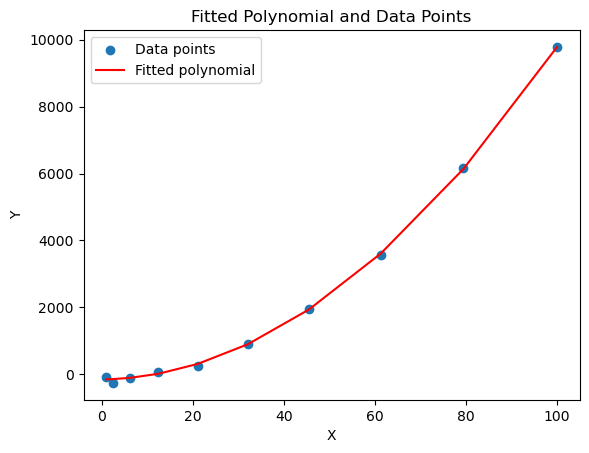

shape of mod_x_list 10
shape of mod_x_list[0] ()


IndexError: list index out of range

In [312]:
# PLACEHOLDER FOR THE MAIN FUNCTION V3
from Validator import Validator

# Instantiate mdv values
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":2, "modifier_data_point":10}
# Create an instance of the Validator Class
validate = Validator()
appendedvars=[]

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
x=1


while mainfunc==True:
    # Run Modifier Controller Function
    mod_x_list = modifier_controller(interval_list=interval_lists,do_plot=False,selected_mod_function=mod_func_A)

    if mod_x_list == False:
        print('*   ITTERATIONS END HERE   *')
        break

    # Run Simulator Fuction
    # print('mod_list shape is: ',np.shmod_x_list))
    sim_y_list = simulator(mod_x_list,selected_function=sim_func_A)
    assert len(mod_x_list) == len(sim_y_list)
    # Get ranges of unfit points ( IF ANY )
    # ranges = validate.get_range(mod_x_list,sim_y_list)
    # mod_x_list = [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
    # sim_y_list = [-18785.46448566434, -22589.28977083527, -13875.22366018544, -8366.169916783167, -10461.393801292468, 5188.58062260236, 76235.86972207189, 197523.09425923007, 435446.98046035116, 1004675.2544642929]
    for i in range(0,np.shape(mod_x_list)[1]): 
        print('shape of mod_x_list',np.shape(mod_x_list)[1])
        print('shape of mod_x_list[0]',np.shape(mod_x[0]))
        outlier,good_fit = curve_fit(mod_x_list[i],sim_y_list[i], threshold=1)

    ranges=get_range(mod_x,outlier,delta=0.7)
    print(outlier)

    interval_lists = ranges


# TODO: 
# Validator needs to work as a loop within itseft that accepts 3 different sets of points
# understand curve fitting
# Fix ranges





from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures

def get_range(x_values,outliers,delta=0.7):
    x_values = np.array(mod_x)
    relative_max = x_values[-1]
    relative_min = x_values[0]
    
    # Calculate ranges of outliers
    outlier_ranges = []
    current_range = [outliers[0]]

    for i in range(1, len(outliers)):
        if outliers[i] == outliers[i-1] + 1:
            current_range.append(outliers[i])
        else:
            outlier_ranges.append(current_range)
            current_range = [outliers[i]]

    # Add the last range
    outlier_ranges.append(current_range)

    # Get x value ranges for each outlier range
    x_outlier_ranges = []
    for outlier_range in outlier_ranges:
        print(outlier_range)
        delta_low=delta*np.abs(x_values[outlier_range] - x_values[outlier_range[0]-1])
        delta_high=delta*np.abs(x_values[outlier_range] - x_values[outlier_range[1]+1])
        x_range_min = np.min(x_values[outlier_range])-delta_low
        x_range_max = np.max(x_values[outlier_range])+delta_high
        print(x_range_min)
        # if x_range_max>relative_max:x_range_max=relative_max
        # if x_range_min<relative_min:x_range_min = relative_min
        x_outlier_ranges.append((x_range_min, x_range_max))


    print("Ranges of outlier x values:")
    for i, x_range in enumerate(x_outlier_ranges):
        print(f"Outlier Range {i+1}: {x_range[0]} to {x_range[1]}")
    
    return x_outlier_ranges



def curve_fit(mod_x,sim_y, threshold=3):
    # Example data
    # mod_x = [1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
    # sim_y = [-18785.46448566434, -22589.28977083527, -13875.22366018544, -8366.169916783167, -10461.393801292468, 5188.58062260236, 76235.86972207189, 197523.09425923007, 435446.98046035116, 1004675.2544642929]

    # Reshape the arrays to match HuberRegressor's expectations
    x_values = np.array(mod_x)
    y_values = np.array(sim_y)

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x_values.reshape(-1, 1))

    # Fit a polynomial model using HuberRegressor
    huber_regressor = HuberRegressor()
    huber_regressor.fit(x_poly, y_values)

    # Predict y values based on the fitted polynomial model
    predicted_y_values = huber_regressor.predict(x_poly)

    # Calculate residuals (differences between actual y and predicted y)
    residuals = y_values - predicted_y_values

    # Calculate the median absolute deviation (MAD) of the residuals
    median_absolute_deviation = np.median(np.abs(residuals))

    # Define a threshold for outliers (e.g., 3 times MAD)
    outlier_threshold = threshold * median_absolute_deviation

    # Identify outliers
    outliers = np.where(np.abs(residuals) > outlier_threshold)[0]

    # Identify points of good fit
    good_fit_points = np.where(np.abs(residuals) <= outlier_threshold)[0]

    print("Outlier indices:", outliers)
    print("Good fit indices:", good_fit_points)

    # Plot the original data and the fitted polynomial curve
    plt.scatter(x_values, y_values, label='Data points')
    plt.plot(x_values, predicted_y_values, color='red', label='Fitted polynomial')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fitted Polynomial and Data Points')
    plt.show()
    return outliers, good_fit_points
